#  PART ONE: NETWORKS

## Part 1: London’s underground resilience

## I.1. Centrality measures:

In [267]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter
import random

## Constructing the networks
Using the tube network file called "london_tubenetwork.graphml". The file has everything we need to construct the graph. A __graphml__ is a format that describes the structural properties of a graph.

In [268]:
#OK, let us start with the graphml file for London's underground

G = nx.read_graphml('london_updated.graph')

#Since coords. are string type, converting them to turple using eval() 
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [269]:
type(G)

networkx.classes.graph.Graph

In [270]:
# list all operations of the G object
print(len(dir(G)))
for i in np.random.randint(0, len(dir(G)), 10):
    print(dir(G)[i])

76
add_nodes_from
__setattr__
update
subgraph
get_edge_data
add_edges_from
to_undirected_class
__len__
__new__
__ge__


In [271]:
# Printing the number of edges(links) and nodes (vertex)
print(G.number_of_nodes())
print(G.number_of_edges())

401
467


In [272]:
# checking node attributes:
list(G.nodes(data = True))[0]

('Brixton', {'coords': (531054.1492209797, 175421.9307214191)})

In [273]:
# checking edges attributes:
list(G.edges(data = True))[0]

('Brixton',
 'Stockwell',
 {'length': 1586.7375413017655, 'line_name': 'Victoria', 'flows': 28465})

In [274]:
# now, to check edges attributes:
list(G.edges(data = True))[0]

('Brixton',
 'Stockwell',
 {'length': 1586.7375413017655, 'line_name': 'Victoria', 'flows': 28465})

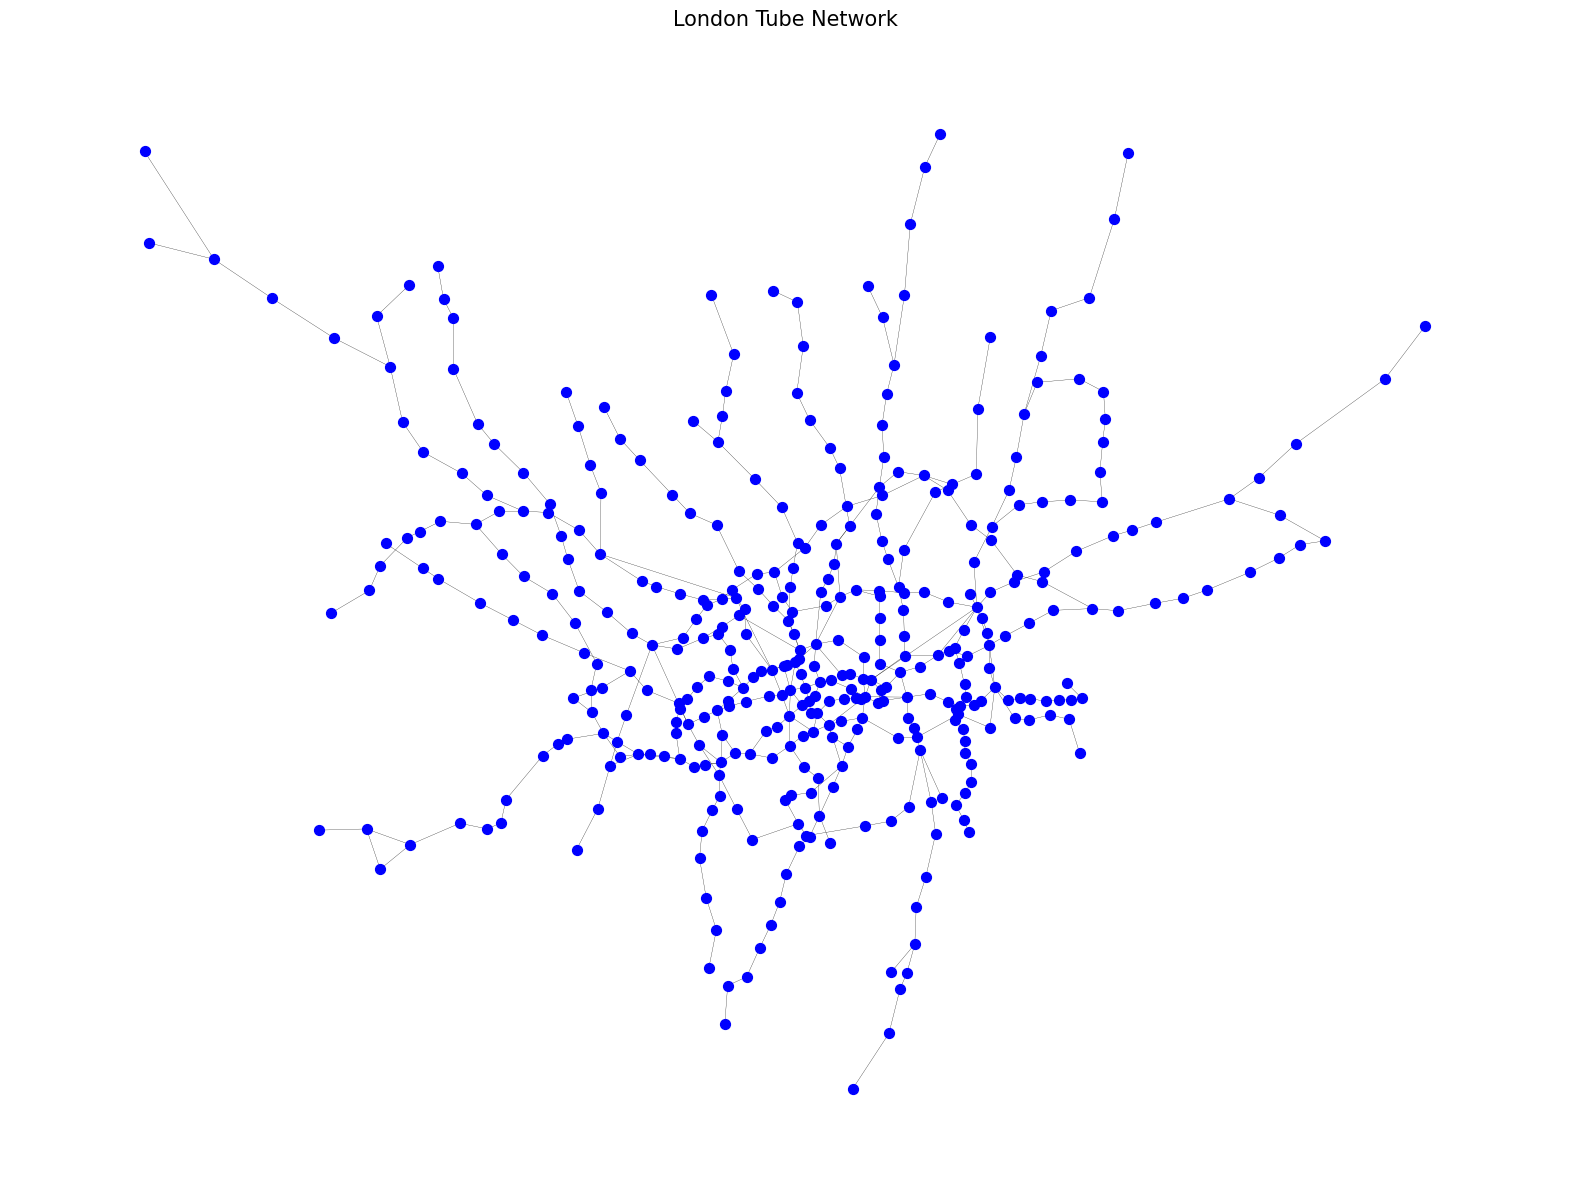

In [275]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(20,15))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London Tube Network",fontsize=15)
plt.axis("off")
plt.show()


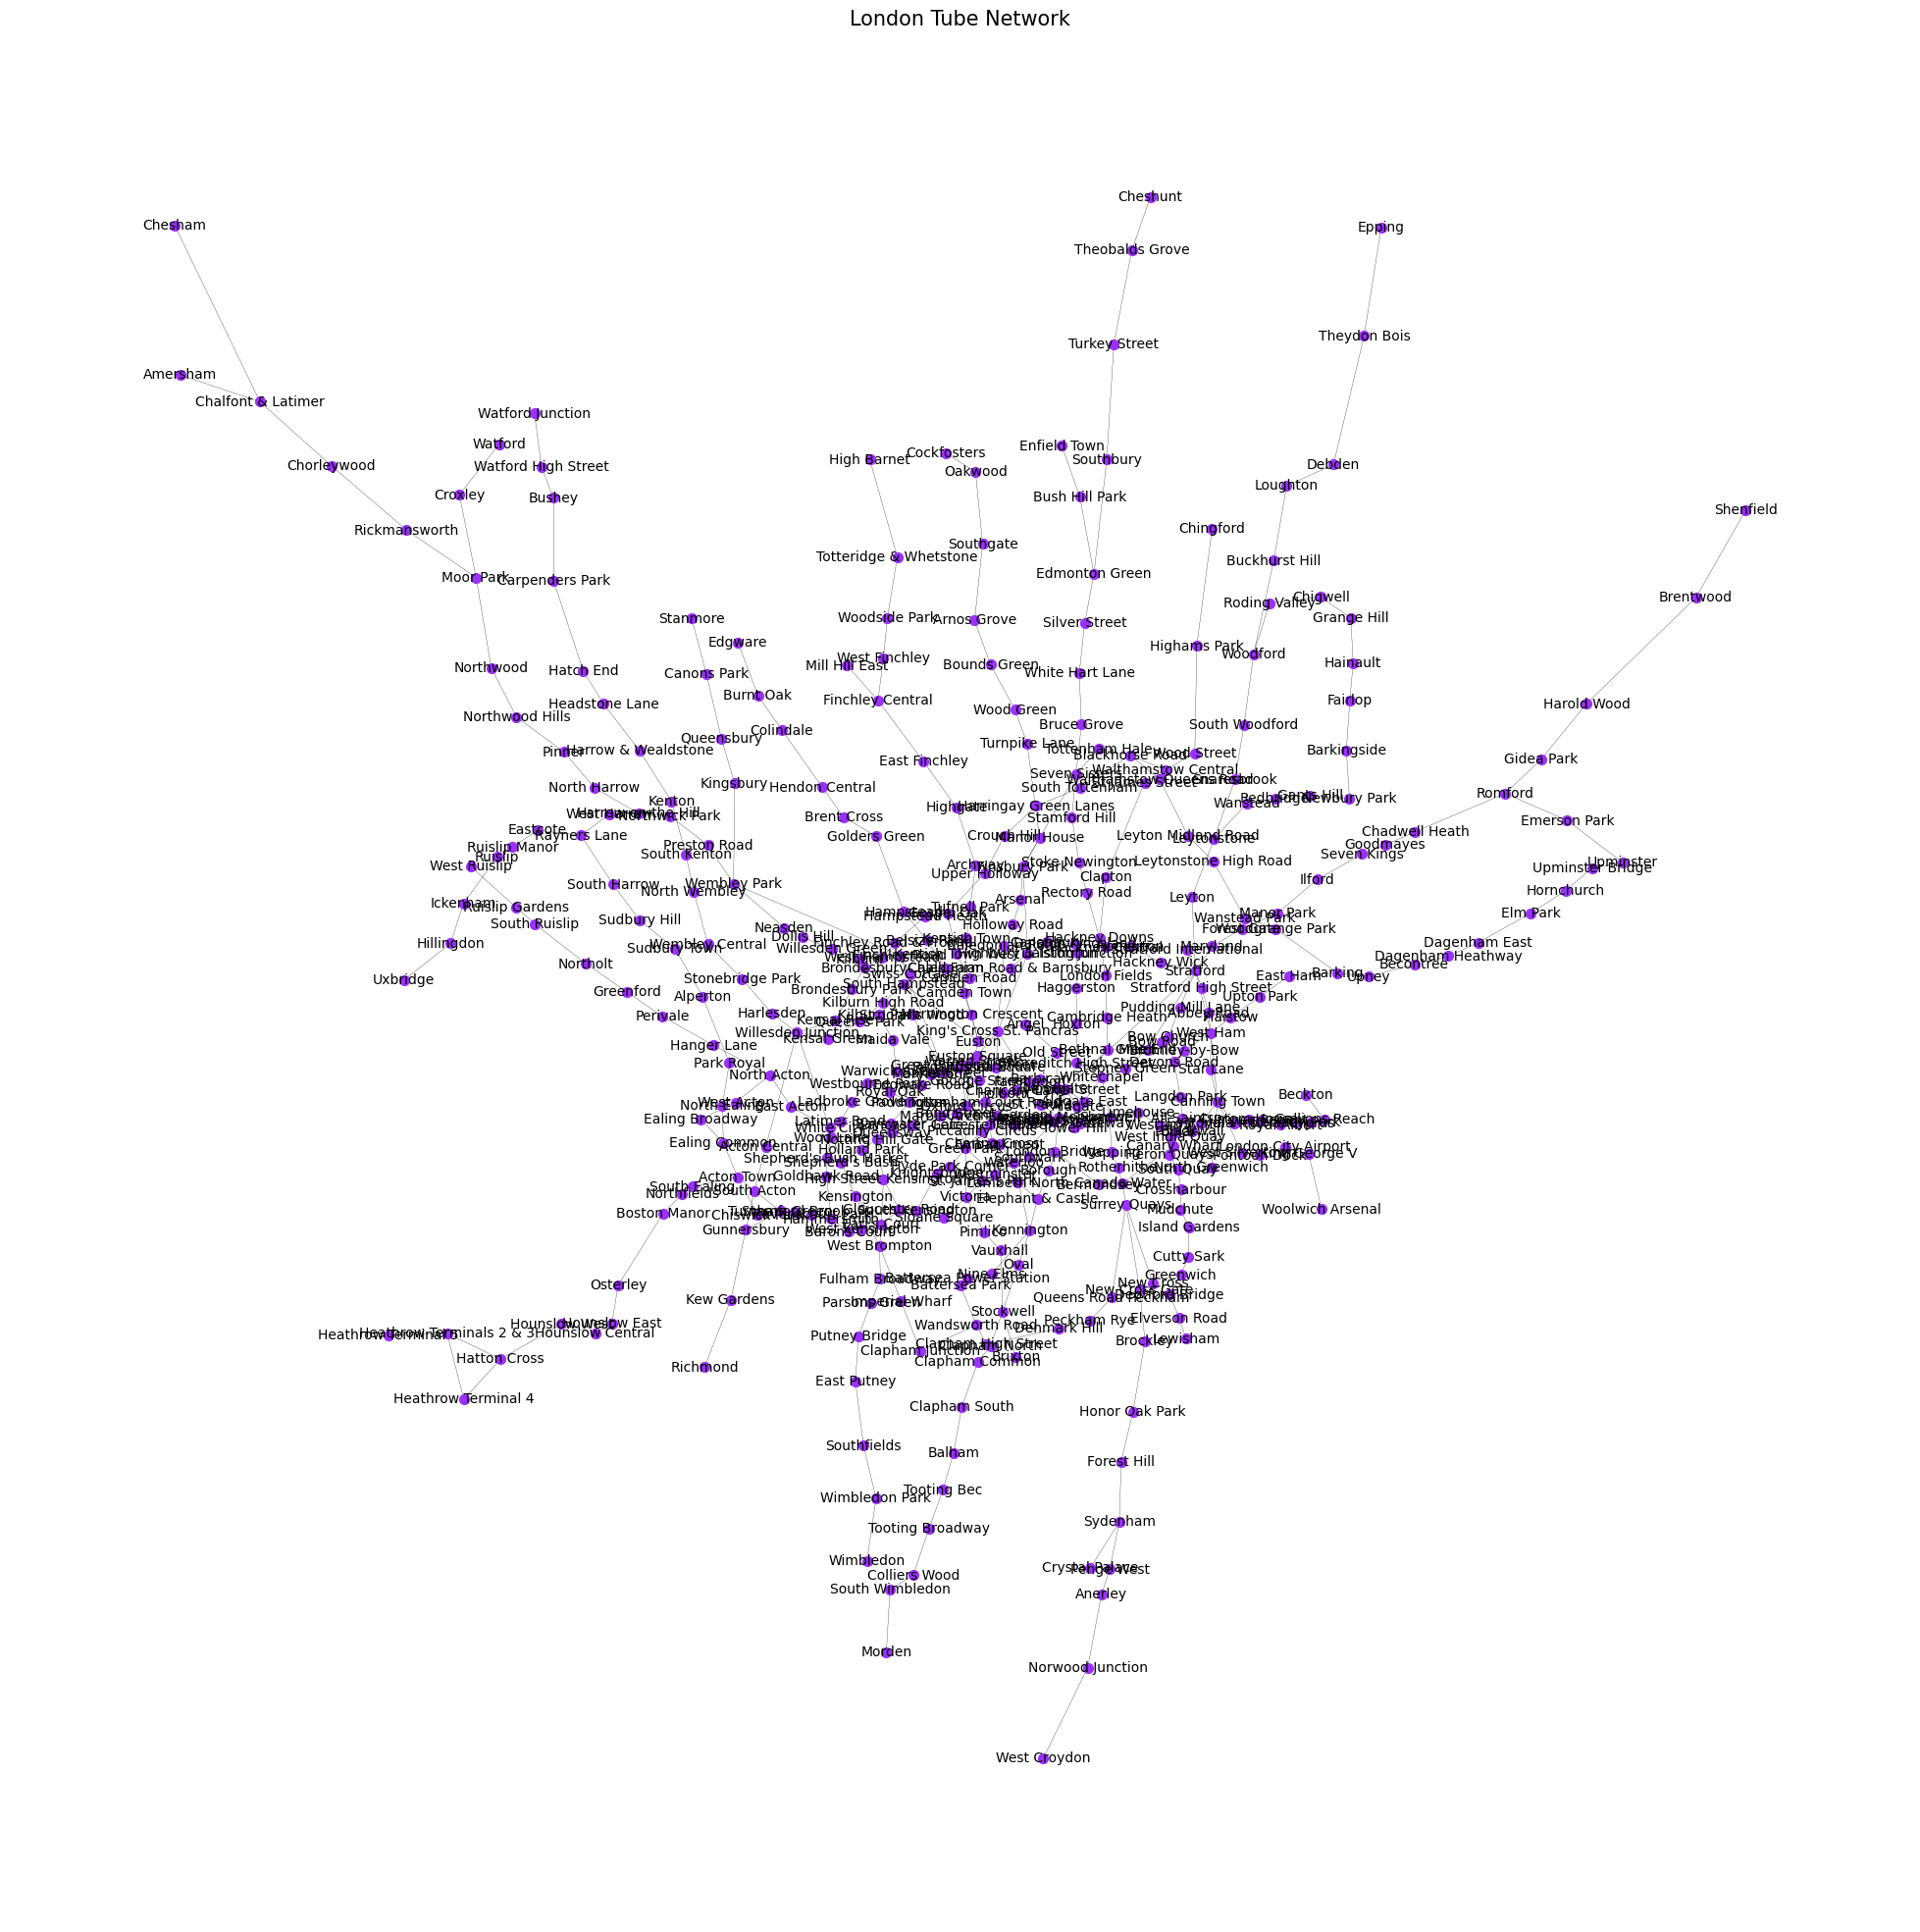

In [276]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,25))

#node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='#9B30FF')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, font_size=10, font_color='black')

plt.title("London Tube Network",fontsize=15)
plt.axis("off")
plt.show()

In [277]:
 #printing the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:20]

,source,target,line_name,length,flows
0,Brixton,Stockwell,Victoria,1586.737541,28465
1,Stockwell,Vauxhall,Victoria,1506.855710,57056
2,Stockwell,Oval,Northern,1284.024538,51273
3,Stockwell,Clapham North,Northern,952.301879,59928
4,Vauxhall,Pimlico,Victoria,825.328253,71742
5,Pimlico,Victoria,Victoria,1399.878151,78192
6,Victoria,Green Park,Victoria,1209.599809,187979
7,Victoria,Sloane Square,District,1165.759013,120843
8,Victoria,St. James's Park,District,777.305596,38168
9,Green Park,Oxford Circus,Victoria,1010.566475,138613


## Exploring the Network

In [278]:
#if want to know what is the maximum distance between stations
max_dist=max({weight for e1, e2, weight in G.edges(data='length')})
max_dist
#This distance in given in meters

7266.373927496486

In [279]:
# want to know the edge connecting the stations farther away from each other
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.373927496486, 'line_name': 'Metropolitan', 'flows': 55186})

## Centrality Measure
Degree Centrality on nodes

Centrality measures are important metrics used to identify the most influential or important nodes in a network. In the context of the underground network, we can use centrality measures to identify stations that play crucial roles in the functioning of the underground system. Here are three centrality measures that can be applied:

Centrality Measures allows us to pinpoint the most important nodes of a Graph. This essentially helps us to identify:

- Influential nodes in a Social Network
- Nodes that disseminate information to many nodes
- Hubs in a transportation network
- Important pages in the Web
- Nodes that prevent the Network from breaking up
 g up


## Degree Centrality

Definition: Degree centrality measures the number of direct connections a node has. In other words, it counts how many other nodes are directly connected to the node of interest.

**Equation:** 

\begin{equation} C_{D}(v) = \frac{deg(v)}{n-1} \end{equation}


Context: In the underground network, degree centrality can represent the number of direct connections (i.e., direct subway lines) a station has. Stations with higher degree centrality are those that are directly connected to many other stations, indicating their importance in terms of accessibility and connectivity.

Context: Stations with higher degree centrality serve as key interchange points where passengers can switch between different lines. They play a crucial role in facilitating passenger movement and reducing travel time.

Justification: Degree centrality allows us to identify stations that serve as major transfer points, indicating their significance in the overall functioning of the underground network.

In [280]:
#  calculating the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [281]:
# Creating dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
Baker Street,0.0175
King's Cross St. Pancras,0.0175
Liverpool Street,0.0150
Canning Town,0.0150
Waterloo,0.0150
Green Park,0.0150
Oxford Circus,0.0150
West Ham,0.0150


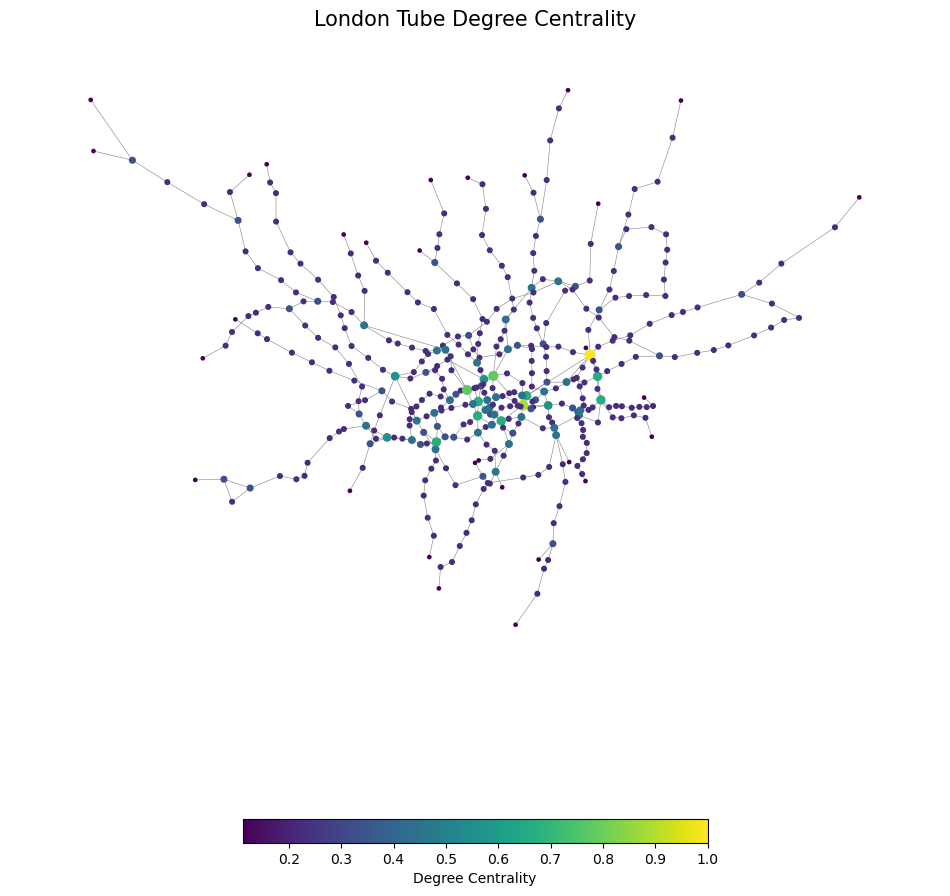

In [282]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Degree Centrality",fontsize=15)
plt.show()

## Betweenness Centrality:

Definition: Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes in the network. Nodes with high betweenness centrality act as bridges or intermediaries between different parts of the network.


**Equationn:**

\begin{equation} C_{B}(v) = \sum_{s,t \neq v} \frac{\sigma_{st}(v)}{\sigma_{st}} \end{equation}

Context: In the underground network, stations with high betweenness centrality are those that lie on many shortest paths between other stations. These stations play a crucial role in connecting different parts of the network and facilitating passenger flow.

Context: Stations with high betweenness centrality serve as strategic locations for routing passenger flow. They are critical for ensuring efficient transportation by facilitating the movement of passengers between different parts of the network.

Justification: Betweenness centrality identifies stations that are essential for maintaining connectivity and flow within the underground network. They play a vital role in maintaining the overall efficiency and resilience of the network.
k.


In [283]:
# calculating betweeness Centrality
bet_cent = nx.betweenness_centrality(G, normalized=False)

# adding 'betweenes centrality' as 'betweeness_centrality'
nx.set_node_attributes(G, dict(bet_cent), "betweenness_centrality")

# see if 'betweeness_centrality' is added
list(G.nodes(data=True))[0:3]

[('Brixton',
  {'coords': (531054.1492209797, 175421.9307214191),
   'degree': 0.0025,
   'betweenness_centrality': 0.0}),
 ('Stockwell',
  {'coords': (530496.8577275898, 176472.9299082592),
   'degree': 0.01,
   'betweenness_centrality': 4146.25}),
 ('Vauxhall',
  {'coords': (530420.2721309648, 177894.3861118151),
   'degree': 0.005,
   'betweenness_centrality': 2244.7833333333356})]

In [284]:
# converting betweeness centrality to a dataframe(df)
df_bet_cent = pd.DataFrame(index=G.nodes())
df_bet_cent["Betweenness Centrality"] = pd.Series(
    nx.get_node_attributes(G, "betweenness_centrality")
)

# print top 10 
df_betweeness_centrality = df_bet_cent.sort_values(
    ["Betweenness Centrality"], ascending=False
)
df_betweeness_centrality = df_betweeness_centrality[0:10]

df_betweeness_centrality

,Betweenness Centrality
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


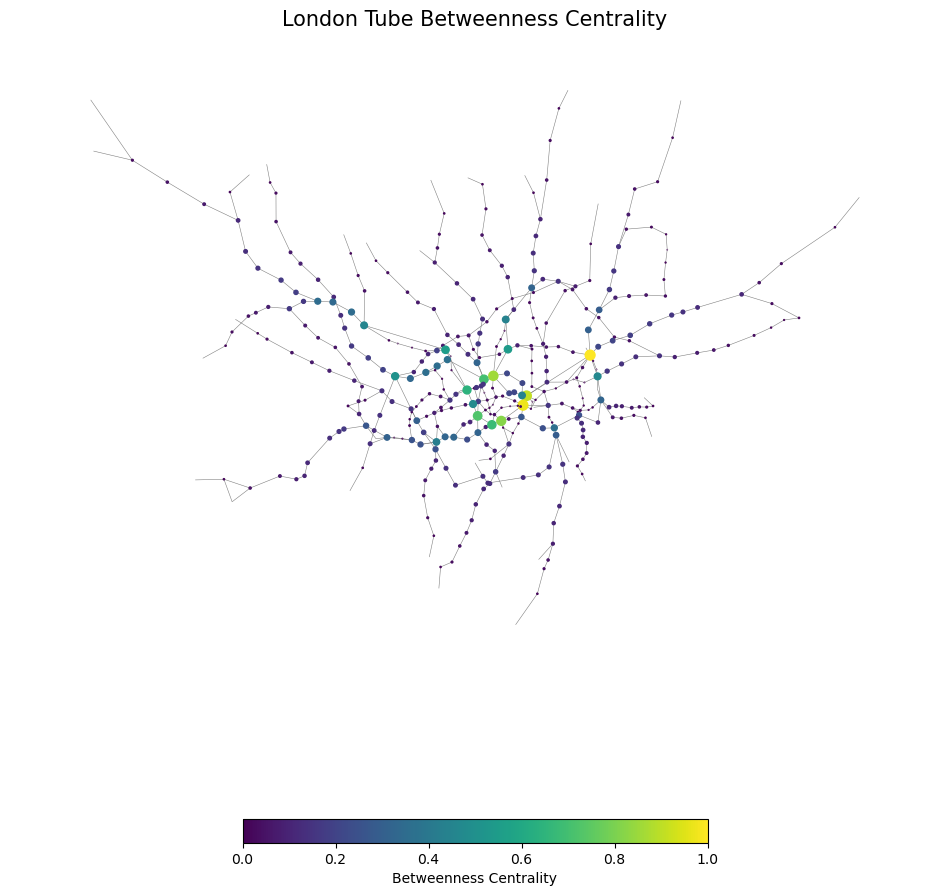

In [285]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['betweenness_centrality']) for i in G.nodes(data=True)]

deg_color=[(i[1]['betweenness_centrality']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['betweenness_centrality']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Betweenness Centrality",fontsize=15)
plt.show()

## Closeness Centrality:

Definition: Closeness centrality measures how close a node is to all other nodes in the network in terms of geodesic distance (i.e., the shortest path length). Nodes with high closeness centrality are those that can reach other nodes quickly.

\begin{equation} C_{i}= \frac{1}{l_{i}} = \frac{n}{\sum_{j} d_{ij}}\end{equation}

Context: In the underground network, closeness centrality can represent how easily passengers can reach a station from other stations. Stations with high closeness centrality are those that are centrally located and well-connected, making them important hubs for passenger movement.

Context: Stations with high closeness centrality are easily accessible from other stations, making them crucial for minimizing travel time and improving network connectivity.

Justification: Closeness centrality helps identify stations that are pivotal for ensuring efficient travel and accessibility within the underground network. They are essential for enhancing passenger convenience and reducing overall journey times.


In [286]:

# Calculating closeness centrality
close_cent = nx.closeness_centrality(G)

# Adding 'closeness centrality' as 'closeness_centrality' to node attributes
nx.set_node_attributes(G, close_cent, "closeness_centrality")

# Verifying if 'closeness_centrality' has been added
list(G.nodes(data=True))[0:3]


[('Brixton',
  {'coords': (531054.1492209797, 175421.9307214191),
   'degree': 0.0025,
   'betweenness_centrality': 0.0,
   'closeness_centrality': 0.0844059928254906}),
 ('Stockwell',
  {'coords': (530496.8577275898, 176472.9299082592),
   'degree': 0.01,
   'betweenness_centrality': 4146.25,
   'closeness_centrality': 0.09216589861751152}),
 ('Vauxhall',
  {'coords': (530420.2721309648, 177894.3861118151),
   'degree': 0.005,
   'betweenness_centrality': 2244.7833333333356,
   'closeness_centrality': 0.09326183259501049})]

In [287]:

# Converting closeness centrality to a dataframe (df)
df_close_cent = pd.DataFrame(index=G.nodes())
df_close_cent["Closeness Centrality"] = pd.Series(
    nx.get_node_attributes(G, "closeness_centrality")
)

# Printing top 10 nodes by closeness centrality
df_closeness_centrality = df_close_cent.sort_values(
    by="Closeness Centrality", ascending=False
)
df_closeness_centrality = df_closeness_centrality[:10]

df_closeness_centrality


,Closeness Centrality
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Angel,0.110742
Farringdon,0.110742
Moorgate,0.110314


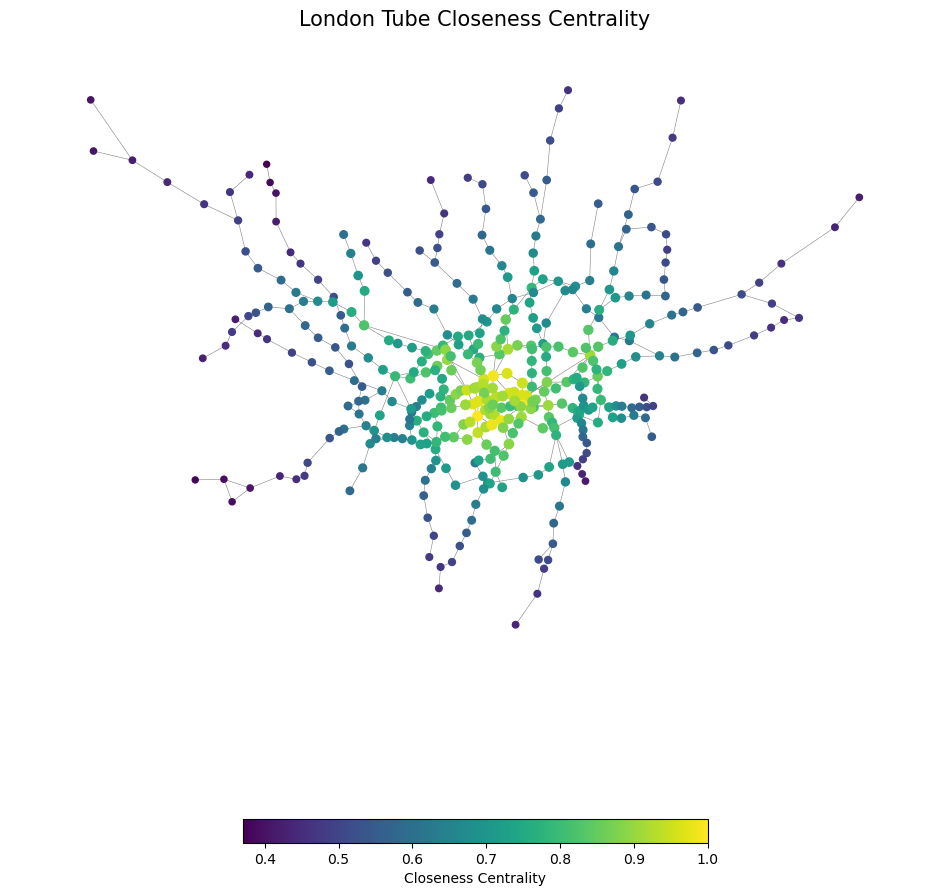

In [288]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['closeness_centrality']) for i in G.nodes(data=True)]

deg_color=[(i[1]['closeness_centrality']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['closeness_centrality']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Closeness Centrality",fontsize=15)
plt.show()

## I.2. Impact measures

Evaluating Network Resilience: Average Shortest Path Length and Global Efficiency

To assess the impact of node removal on networks, whether they be transportation, communication, or social networks, it is crucial to employ robust measures that reflect the overall structure and efficiency of the network. Average Shortest Path Length and Global Efficiency are two such measures that offer comprehensive insights into the network's resilience and connectivity. These measures are not only applicable to the London Underground but can also be generalized to any other network.
These measures help to determine how the network's structure and efficiency are affected by the removal of nodes (such as stations in the case of the London Underground or servers in a communication network).

**1. Average Shortest Path Length (ASPL)**

The average shortest path length is a measure of the efficiency of transport or communication over the network. It is defined as the average number of steps along the shortest paths for all possible pairs of network nodes. A significant increase in the average shortest path length after removing a node indicates that the network has become less efficient and more fragmented.

**Equation**

\begin{equation}
ASPL(G) = \frac{1}{N(N - 1)} \sum_{i \neq j} d(n_i, n_j)
\end{equation}

where:
- \( G \) is the graph,
- \( N \) is the total number of nodes in the graph,
- \( d(n_i, n_j) \) is the shortest path distance between nodes \( n_i \) and \( n_j \),
- The summation is over all pairs of nodes \( i \neq j \).

Node removal impact:

When a node is removed, particularly a central or highly connected node, the ASPL generally increases, indicating that the network has become less efficient and more spread out. The increase in path length post-node removal highlights critical nodes whose absence significantly impacts network performance.

Applicability:

This measure is not specific to any one type of network and can be applied universally to any connected graph whether it is the London Underground, electrical power grids, social networks, or the Internet. The increase in path length post-node removal highlights critical nodes whose absence severely impacts network performance. OR The ASPL metric is universal and can be applied to any network to measure its overall connectivity and transport efficiency. It is particularly useful in networks where path traversal time is critical, such as transportation networks (e.g., the London Underground) or communication networks.

**2. Global Efficiency (GE)**

Global Efficiency is a measure of how efficiently information is exchanged over the network. It is an average inverse shortest path length in the network, offering a clear picture of the network's functional efficiency.

**Equation:**

\begin{equation}
GE = \frac{1}{N(N-1)} \sum_{i \neq j} \frac{1}{d(n_i, n_j)}
\end{equation}

Where \( d(n_i, n_j) \) is the shortest path length between nodes \( n_i \) and \( n_j \).

Impact of Node Removal:

Removing nodes, especially key nodes, can lead to a decrease in global efficiency, which indicates a reduction in the network's overall capability to facilitate efficient communication. The drop in global efficiency upon node removal can be used to identify potential points of failure in network infrastructure.

Applicability

Like ASPL, Global Efficiency is not specific to any one type of network and can be used broadly across different types of networks including transportation networks, social networks, communication networks, etc. It is particularly valuable in networks where quick and efficient communication or transport is essential.

General Applicability

Both Average Shortest Path Length and Global Efficiency are generalized measures that can be applied to any interconnected system to assess its robustness and efficiency. Their application is not confined to the London Underground and can provide critical insights into the resilience of various types of networks by highlighting how node removals (deliberate or accidental) can disrupt network functionality. These measures are particularly important in the design and analysis of resilient networked systems where connectivity and rapid response are crucial.


## I.3. Node removal Analysis

**Creating six copies of G for the analysis**

Before conducting removal analysis, we copy G into 6 distinct graphs. This ensures that each removal process does not impact the other.

Non-sequential Analysis Graph names:
- Degree Centrality = GD_ns
- Betweenness Centrality = GB_ns
- Closeness Centrality = GC_ns

Sequential Analysis Graph names
- Degree Centrality = GD_s
- Betweenness Centrality = GB_s
- Closeness Centrality = GC_s

In [289]:
# non-sequential graphs
GD_ns = G.copy()
GB_ns = G.copy()
GC_ns = G.copy()

# non-sequential graph list
G_ns_list = [GD_ns, GB_ns, GC_ns]

# sequential graphs
GD_s = G.copy()
GB_s = G.copy()
GC_s = G.copy()

# sequential graph list
G_s_list = [GD_s, GB_s, GC_s]

## Basic Computations/Analysis

In the following discussion, I establish a method for computing 'Largest Component Size' and 'Average Shortest Path Length' as well as other statistical measures.

In [290]:
# largest component size and number of connected components
# calculating number of components, diameter of the network and the number of connected components
components = nx.connected_components(G)

# no. of connected components
num_components = nx.number_connected_components(G)

# diameter
diameter = nx.diameter(G)

# find size of largest component
largest_component = max(components, key=len)


# print
print (f"The number of nodes in the largest component is {(len(largest_component))}")
print (f"The number of connected components is {num_components}")
print (f"The diameter of the London underground is {diameter}")

The number of nodes in the largest component is 401
The number of connected components is 1
The diameter of the London underground is 36


In [291]:
# calculating the average shortest distance
components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)

# find & print the average shortest path length for lc
avg_shortest_path = nx.average_shortest_path_length(subgraph)
print (f"The average shortest path is {avg_shortest_path}")

The average shortest path is 13.545997506234414


In [292]:
# looking at attribute names
list(G.nodes(data=True))[0]

('Brixton',
 {'coords': (531054.1492209797, 175421.9307214191),
  'degree': 0.0025,
  'betweenness_centrality': 0.0,
  'closeness_centrality': 0.0844059928254906})

# 1.3(A) Non-Sequential Removal of Nodes: Degree Centrality

In [293]:
stations_removed = []
components_no_list = []
shortest_path_list = []
global_efficiency_list = []
largest_comp_size_list = []

for _ in range(10):
    degree_centrality_dict = nx.degree_centrality(GC_ns)
    sorted_degree_centrality = sorted(degree_centrality_dict.items(), key=lambda item: item[1], reverse=True)[:10]
    
    # randomly select one station from the top 10
    station_to_remove, _ = random.choice(sorted_degree_centrality)
    stations_removed.append(station_to_remove)
    
    # remove the selected station from the graph
    GC_ns.remove_node(station_to_remove)
    
    # recalculate network metrics
    components = list(nx.connected_components(GC_ns))
    largest_component = max(components, key=len)
    largest_subgraph = GC_ns.subgraph(largest_component)
    
    components_no = len(components)
    components_no_list.append(components_no)
    
    largest_comp_size_list.append(len(largest_component))
    
    if nx.is_connected(largest_subgraph):
        shortest_path = nx.average_shortest_path_length(largest_subgraph)
        global_efficiency = nx.global_efficiency(largest_subgraph)
    else:
        shortest_path = None
        global_efficiency = 0
    
    shortest_path_list.append(shortest_path if shortest_path is not None else "Disconnected")
    global_efficiency_list.append(global_efficiency)
    
    # print
    print(f"Station Removed: ['{station_to_remove}']")
    print(len(list(GC_ns.nodes())))
    print(f"Number of components {components_no}")
    print(f"Largest component average shortest path is {shortest_path if shortest_path is not None else 'Disconnected'}")
    print(f"Global Efficiency: {global_efficiency}")

Station Removed: ['Canning Town']
400
Number of components 3
Largest component average shortest path is 13.523717716994016
Global Efficiency: 0.10170650431190509
Station Removed: ['Green Park']
399
Number of components 3
Largest component average shortest path is 13.81028194603324
Global Efficiency: 0.09953569949228491
Station Removed: ['Stratford']
398
Number of components 5
Largest component average shortest path is 14.751823933642115
Global Efficiency: 0.09692968468828189
Station Removed: ['Shadwell']
397
Number of components 6
Largest component average shortest path is 14.935323916071074
Global Efficiency: 0.09550056867370799
Station Removed: ['Oxford Circus']
396
Number of components 6
Largest component average shortest path is 15.055063096337335
Global Efficiency: 0.0944018203085332
Station Removed: ['King's Cross St. Pancras']
395
Number of components 6
Largest component average shortest path is 16.561234911792013
Global Efficiency: 0.08697799486816403
Station Removed: ['Earl's 

In [294]:
# summary
df_nsdegree = pd.DataFrame(
    list(
        zip(
            stations_removed,
            components_no_list,
            shortest_path_list,
            global_efficiency_list,
            largest_comp_size_list,
        )
    ),
    columns=[
        "Station Removed (non_seq)",
        "No.of Components (non_seq)",
        "Avg. Shortest Path (non_seq)",
        "Global efficiency (non_seq)",
        "Size of largest component (non_seq)",
    ],
)
df_nsdegree

,Station Removed (non_seq),No.of Components (non_seq),Avg. Shortest Path (non_seq),Global efficiency (non_seq),Size of largest component (non_seq)
0,Canning Town,3,13.523718,0.101707,387
1,Green Park,3,13.810282,0.099536,386
2,Stratford,5,14.751824,0.096930,364
3,Shadwell,6,14.935324,0.095501,362
4,Oxford Circus,6,15.055063,0.094402,361
5,King's Cross St. Pancras,6,16.561235,0.086978,360
6,Earl's Court,6,16.978354,0.084856,359
7,Stockwell,8,16.912982,0.085726,348
8,Willesden Junction,9,17.568395,0.084071,334
9,Euston,10,17.283664,0.086798,311


## 1.3(A) Non-Sequential Removal of Nodes: Betweenness Centrality

In [295]:
stations_removed = []
components_no_list = []
shortest_path_list = []
global_efficiency_list = []
largest_comp_size_list = []

for _ in range(10):
    betweenness_dict = nx.betweenness_centrality(GB_ns)
    sorted_betweenness = sorted(betweenness_dict.items(), key=lambda item: item[1], reverse=True)[:10]
    
    # randomly select one station from the top 10
    station_to_remove, _ = random.choice(sorted_betweenness)
    stations_removed.append(station_to_remove)
    
    # remove the selected station from the graph
    GB_ns.remove_node(station_to_remove)
    
    # recalculate network metrics
    components = list(nx.connected_components(GB_ns))
    largest_component = max(components, key=len)
    largest_subgraph = GB_ns.subgraph(largest_component)
    
    components_no = len(components)
    components_no_list.append(components_no)
    
    largest_comp_size_list.append(len(largest_component))
    
    if nx.is_connected(largest_subgraph):
        shortest_path = nx.average_shortest_path_length(largest_subgraph)
        global_efficiency = nx.global_efficiency(largest_subgraph)
    else:
        shortest_path = None
        global_efficiency = 0
    
    shortest_path_list.append(shortest_path if shortest_path is not None else "Disconnected")
    global_efficiency_list.append(global_efficiency)
    
    # print
    print(f"Station Removed: ['{station_to_remove}']")
    print(len(list(GB_ns.nodes())))
    print(f"Number of components {components_no}")
    print(f"Largest component average shortest path is {shortest_path if shortest_path is not None else 'Disconnected'}")
    print(f"Global Efficiency: {global_efficiency}")

Station Removed: ['Westminster']
400
Number of components 1
Largest component average shortest path is 13.846015037593984
Global Efficiency: 0.0994990747175481
Station Removed: ['Willesden Junction']
399
Number of components 2
Largest component average shortest path is 13.818410604939102
Global Efficiency: 0.10017168254217419
Station Removed: ['Stratford']
398
Number of components 4
Largest component average shortest path is 14.745360699906154
Global Efficiency: 0.09708103514000414
Station Removed: ['Finsbury Park']
397
Number of components 5
Largest component average shortest path is 15.158542213734384
Global Efficiency: 0.09561968773425776
Station Removed: ['King's Cross St. Pancras']
396
Number of components 6
Largest component average shortest path is 15.646967846967847
Global Efficiency: 0.09249877356979877
Station Removed: ['Earl's Court']
395
Number of components 6
Largest component average shortest path is 16.292918542775276
Global Efficiency: 0.08979640466991425
Station Remove

In [296]:
# summary
df_nsbetweeness = pd.DataFrame(
    list(
        zip(
            stations_removed,
            components_no_list,
            shortest_path_list,
            global_efficiency_list,
            largest_comp_size_list,
        )
    ),
    columns=[
        "Station Removed (non_seq)",
        "No.of Components (non_seq)",
        "Avg. Shortest Path (non_seq)",
        "Global efficiency (non_seq)",
        "Size of largest component (non_seq)",
    ],
)

df_nsbetweeness

,Station Removed (non_seq),No.of Components (non_seq),Avg. Shortest Path (non_seq),Global efficiency (non_seq),Size of largest component (non_seq)
0,Westminster,1,13.846015,0.099499,400
1,Willesden Junction,2,13.818411,0.100172,386
2,Stratford,4,14.745361,0.097081,364
3,Finsbury Park,5,15.158542,0.095620,355
4,King's Cross St. Pancras,6,15.646968,0.092499,351
5,Earl's Court,6,16.292919,0.089796,350
6,Canada Water,6,17.590192,0.085790,349
7,Shepherd's Bush,7,17.007610,0.090075,319
8,Wembley Park,8,19.191571,0.085792,314
9,Paddington,9,14.166423,0.106803,240


## 1.3(A) Non-Sequential Removal of Nodes: Closeness Centrality

In [297]:
stations_removed = []
components_no_list = []
shortest_path_list = []
global_efficiency_list = []
largest_comp_size_list = []

for _ in range(10):
    closeness_dict = nx.closeness_centrality(GC_ns)
    sorted_closeness = sorted(closeness_dict.items(), key=lambda item: item[1], reverse=True)[:10]
    
    # randomly select one station from the top 10
    station_to_remove, _ = random.choice(sorted_closeness)
    stations_removed.append(station_to_remove)
    
    # remove the selected station from the graph
    GC_ns.remove_node(station_to_remove)
    
    # recalculate network metrics
    components = list(nx.connected_components(GC_ns))
    largest_component = max(components, key=len)
    largest_subgraph = GC_ns.subgraph(largest_component)
    
    components_no = len(components)
    components_no_list.append(components_no)
    
    largest_comp_size_list.append(len(largest_component))
    
    if nx.is_connected(largest_subgraph):
        shortest_path = nx.average_shortest_path_length(largest_subgraph)
        global_efficiency = nx.global_efficiency(largest_subgraph)
    else:
        shortest_path = None
        global_efficiency = 0
    
    shortest_path_list.append(shortest_path if shortest_path is not None else "Disconnected")
    global_efficiency_list.append(global_efficiency)
    
    # print
    print(f"Station Removed: ['{station_to_remove}']")
    print(len(list(GC_ns.nodes())))
    print(f"Number of components {components_no}")
    print(f"Largest component average shortest path is {shortest_path if shortest_path is not None else 'Disconnected'}")
    print(f"Global Efficiency: {global_efficiency}")

Station Removed: ['Waterloo']
390
Number of components 10
Largest component average shortest path is 17.812423008664787
Global Efficiency: 0.08417939692321273
Station Removed: ['Edgware Road']
389
Number of components 10
Largest component average shortest path is 18.283003404362628
Global Efficiency: 0.082480571972609
Station Removed: ['Bank and Monument']
388
Number of components 10
Largest component average shortest path is 22.115529421718346
Global Efficiency: 0.07330788266900368
Station Removed: ['Finchley Road']
387
Number of components 10
Largest component average shortest path is 27.981690830512445
Global Efficiency: 0.06599490918548435
Station Removed: ['North Ealing']
386
Number of components 11
Largest component average shortest path is 16.356102221160736
Global Efficiency: 0.10034282697593452
Station Removed: ['West Brompton']
385
Number of components 13
Largest component average shortest path is 16.596309756779423
Global Efficiency: 0.10539462705724673
Station Removed: ['Fi

In [298]:
# summarise results into a df which displays: no. of components, avg shortest path, global efficiency, largest component size
df_nscloseness = pd.DataFrame(
    list(
        zip(
            stations_removed,
            components_no_list,
            shortest_path_list,
            global_efficiency_list,
            largest_comp_size_list,
        )
    ),
    columns=[
        "Station Removed (non_seq)",
        "No.of Components (non_seq)",
        "Avg. Shortest Path (non_seq)",
        "Global efficiency (non_seq)",
        "Size of largest component (non_seq)",
    ],
)
df_nscloseness

,Station Removed (non_seq),No.of Components (non_seq),Avg. Shortest Path (non_seq),Global efficiency (non_seq),Size of largest component (non_seq)
0,Waterloo,10,17.812423,0.084179,310
1,Edgware Road,10,18.283003,0.082481,309
2,Bank and Monument,10,22.115529,0.073308,308
3,Finchley Road,10,27.981691,0.065995,307
4,North Ealing,11,16.356102,0.100343,159
5,West Brompton,13,16.596310,0.105395,147
6,Finsbury Park,15,17.263350,0.103607,135
7,Walthamstow Queens Road,15,19.191785,0.099113,134
8,East Acton,15,19.191785,0.099113,134
9,Heron Quays,16,19.191785,0.099113,134
